# **Milestone 2**

### **Import needed libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### **Load the data**

In [8]:
path = "../../data/Faker_Data/preprocessed_data.csv"
df = pd.read_csv(path)

In [9]:
df.sample(5)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups,age_before_working
37053,37649,48,Male,25,Education,5862,Excellent,Very High,High,0,...,Mid,Medium,No,No,No,Good,High,Stayed,46-55,23
40344,11977,41,Male,4,Media,8834,Good,High,Excellent,2,...,Senior,Small,No,Yes,No,Poor,Very High,Stayed,36-45,37
17753,22061,53,Female,27,Finance,14230,Good,Very High,Average,8,...,Senior,Small,Yes,Yes,No,Good,High,Stayed,46-55,26
70724,87732,24,Female,3,Healthcare,3523,Fair,High,High,1,...,Entry,Medium,No,No,No,Good,Low,Stayed,18-25,21
17178,11198,28,Male,6,Finance,3972,Good,Low,High,0,...,Entry,Medium,No,No,No,Good,Medium,Left,26-35,22


In [10]:
df.shape

(71569, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               71569 non-null  int64 
 1   age                       71569 non-null  int64 
 2   gender                    71569 non-null  object
 3   years_at_company          71569 non-null  int64 
 4   job_role                  71569 non-null  object
 5   monthly_income            71569 non-null  int64 
 6   work_life_balance         71569 non-null  object
 7   job_satisfaction          71569 non-null  object
 8   performance_rating        71569 non-null  object
 9   number_of_promotions      71569 non-null  int64 
 10  overtime                  71569 non-null  object
 11  distance_from_home        71569 non-null  int64 
 12  education_level           71569 non-null  object
 13  marital_status            71569 non-null  object
 14  number_of_dependents  

In [12]:
df.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,age_before_working
count,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000
mean,45004.411393,37.467172,9.834523,8154.795791,1.612709,19.411016,1.431570,27.632648
std,26011.829403,9.696294,8.147361,3972.528039,2.000646,14.059812,1.378891,7.962390
min,1.000000,18.000000,0.000000,2410.000000,0.000000,1.000000,0.000000,18.000000
25%,22467.000000,31.000000,3.000000,4798.000000,0.000000,9.000000,0.000000,21.000000
50%,45006.000000,37.000000,8.000000,7345.000000,1.000000,16.000000,1.000000,26.000000
75%,67572.000000,44.000000,15.000000,10384.000000,2.000000,26.000000,2.000000,33.000000
max,89999.000000,65.000000,47.000000,19837.000000,16.000000,134.000000,5.000000,64.000000


In [13]:
df.describe(include='object')

,gender,job_role,work_life_balance,job_satisfaction,performance_rating,overtime,education_level,marital_status,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups
count,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2,5
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Good,High,Stayed,36-45
freq,37055,21268,30185,24893,35795,50604,31947,41188,32226,32136,45680,43230,39190,36159,23915,48347,26559


In [14]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [15]:
df.duplicated().sum()

0

## **1. Advanced Data Analysis**

### **Statistical Tests & Feature Selection**

#### *1. Chi-Squared Test*

In [16]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Define target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Store results
results = []

for col in categorical_cols:
    if col != target:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        significance = "✅" if p < 0.05 else "❌"
        results.append({
            'Feature': col,
            'Chi2': round(chi2, 3),
            'p-value': round(p, 5),
            'DOF': dof,
            'Significant': significance
        })

# Convert to DataFrame
chi_square_df = pd.DataFrame(results).sort_values(by='p-value')

# Display neatly
print("\n=== Chi-Square Test Results vs Attrition ===\n")
print(chi_square_df.to_string(index=False))


=== Chi-Square Test Results vs Attrition ===

                 Feature      Chi2  p-value  DOF Significant
                job_role    89.309  0.00000    4           ✅
       work_life_balance 31470.264  0.00000    3           ✅
        job_satisfaction 34990.416  0.00000    3           ✅
                overtime 14904.511  0.00000    1           ✅
               job_level    98.118  0.00000    2           ✅
            company_size    41.403  0.00000    2           ✅
leadership_opportunities   107.015  0.00000    1           ✅
      company_reputation 26391.894  0.00000    3           ✅
    employee_recognition 26537.150  0.00000    3           ✅
              age_groups    39.219  0.00000    4           ✅
         education_level    15.886  0.00318    4           ✅
          marital_status     7.103  0.02868    2           ✅
             remote_work     1.403  0.23616    1           ❌
                  gender     0.683  0.40840    1           ❌
innovation_opportunities     0.240  0.

In [17]:
# Select features based on chi-square test results
selected_features_chi_square = chi_square_df[chi_square_df['p-value'] < 0.05]['Feature'].tolist()

#### *2. T-test*

In [18]:
# Target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure binary target (like Left/Stayed)
groups = df[target].unique()
if len(groups) != 2:
    raise ValueError(f"T-test requires a binary target variable, found: {groups}")

# Store results
results = []

for col in numeric_cols:
    group1 = df[df[target] == groups[0]][col].dropna()
    group2 = df[df[target] == groups[1]][col].dropna()
    
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
    significance = "✅" if p_val < 0.05 else "❌"
    
    results.append({
        'Feature': col,
        'Group1_mean': round(group1.mean(), 3),
        'Group2_mean': round(group2.mean(), 3),
        'T-Statistic': round(t_stat, 3),
        'p-value': round(p_val, 5),
        'Significant': significance
    })

# Create DataFrame
t_test_df = pd.DataFrame(results).sort_values(by='p-value')

# Display results neatly
print("\n=== T-Test Results for Numerical Columns vs Attrition ===\n")
print(t_test_df.to_string(index=False))


=== T-Test Results for Numerical Columns vs Attrition ===

             Feature  Group1_mean  Group2_mean  T-Statistic  p-value Significant
                 age       37.132       37.628       -6.420  0.00000           ✅
    years_at_company        9.465       10.012       -8.473  0.00000           ✅
      monthly_income     7885.882     8283.960      -12.683  0.00000           ✅
number_of_promotions        1.456        1.688      -14.740  0.00000           ✅
         employee_id    44876.019    45066.081       -0.915  0.36024           ❌
  age_before_working       27.667       27.616        0.802  0.42283           ❌
  distance_from_home       19.440       19.397        0.381  0.70343           ❌
number_of_dependents        1.430        1.432       -0.254  0.79947           ❌


In [19]:
# Select features based on t-test results
selected_features_t_test = t_test_df[t_test_df['p-value'] < 0.05]['Feature'].tolist()

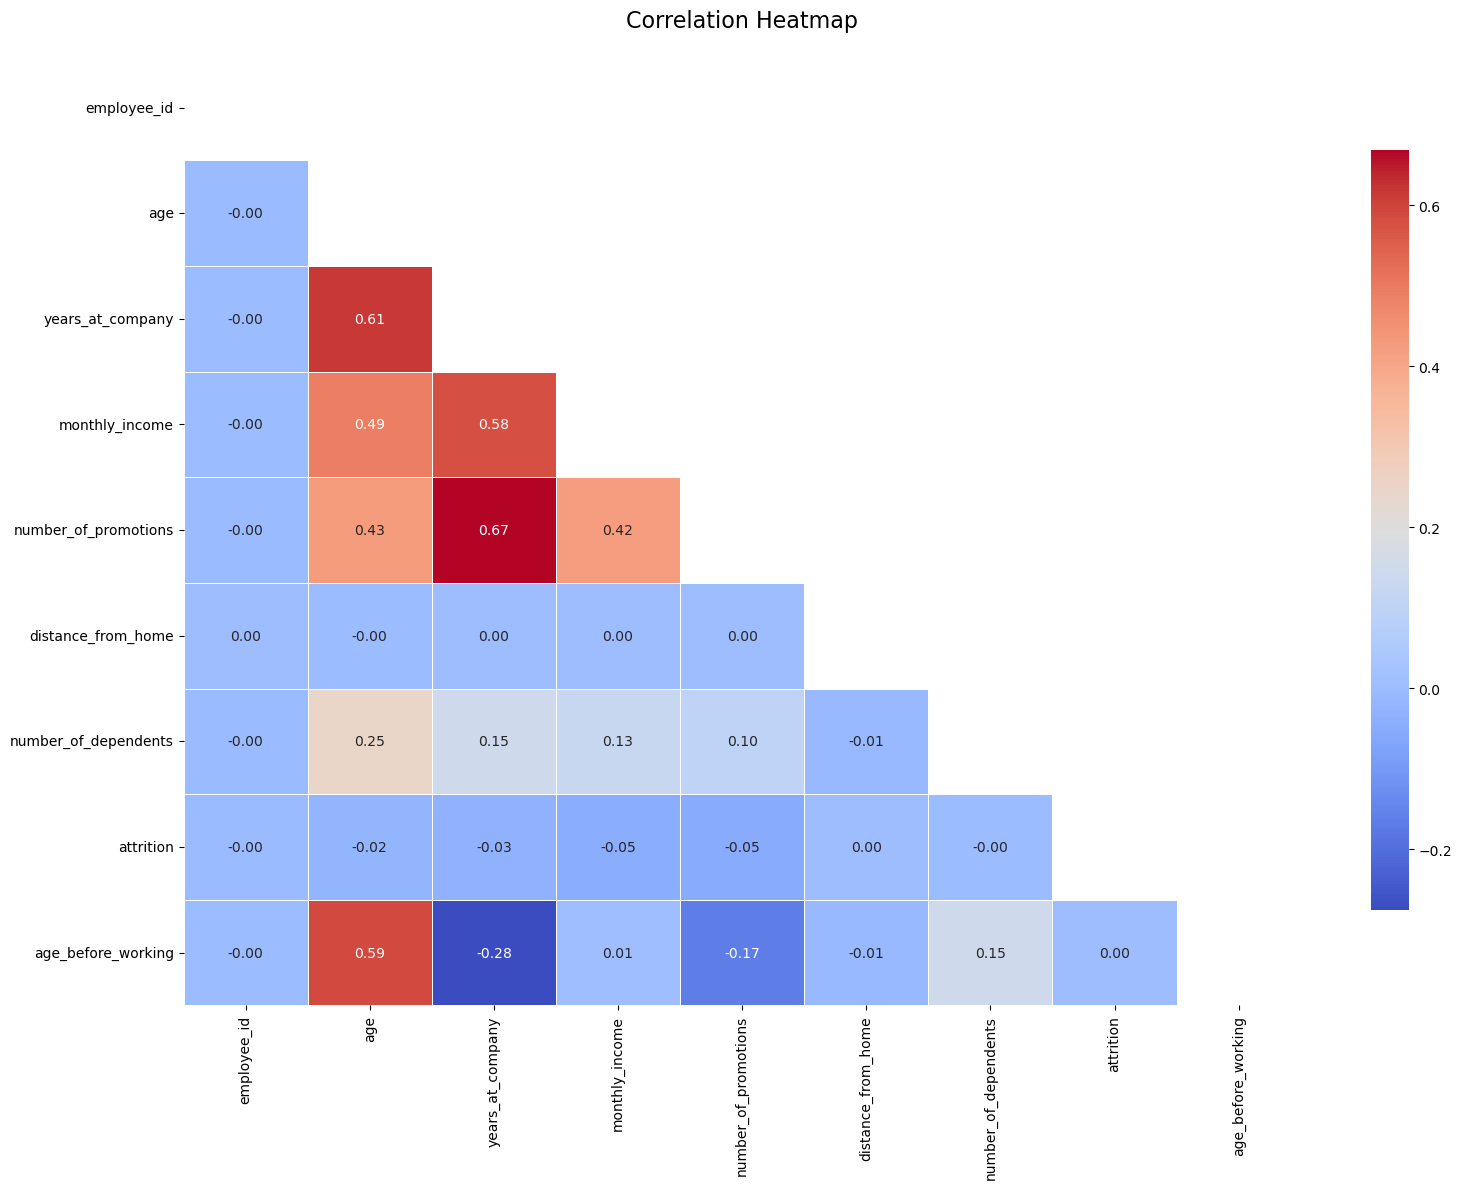

In [20]:
# Copy the dataframe to avoid modifying original
df_encoded = df.copy()

# Encode the tartget variable using label encoding
df_encoded['attrition'] = df_encoded['attrition'].map({'Stayed': 0, 'Left': 1})

# === Compute correlation matrix ===
corr_matrix = df_encoded.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [21]:
selected_features = selected_features_chi_square + selected_features_t_test

In [22]:
df_selected = df[selected_features + ['attrition']]

In [23]:
df_selected.sample(5)

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,attrition
3872,Technology,Fair,Medium,Yes,Entry,Large,No,Fair,High,18-25,Associate Degree,Single,25,4,5046,1,Stayed
56534,Finance,Poor,Low,Yes,Mid,Medium,Yes,Poor,Low,36-45,Bachelor’s Degree,Married,36,18,8604,2,Left
38410,Technology,Good,High,No,Entry,Large,No,Good,Low,18-25,Associate Degree,Single,22,2,5595,0,Stayed
783,Finance,Good,High,No,Mid,Medium,No,Good,High,36-45,Master’s Degree,Divorced,43,4,8345,0,Stayed
9958,Education,Good,High,No,Mid,Medium,No,Good,High,26-35,Bachelor’s Degree,Married,33,5,5643,1,Stayed


In [24]:
df_selected.shape

(71569, 17)

## **Feature Engineering**

### **Create New Features**

In [25]:
df_selected['years_at_company'].describe()

count    71569.000000
mean         9.834523
std          8.147361
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [26]:
df_selected['monthly_income'].describe()

count    71569.000000
mean      8154.795791
std       3972.528039
min       2410.000000
25%       4798.000000
50%       7345.000000
75%      10384.000000
max      19837.000000
Name: monthly_income, dtype: float64

In [27]:
# Create new features from old ones (boundries are the quartile values)
# 1️⃣ Tenure Categories
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

df_selected['tenure_category'] = df_selected['years_at_company'].apply(tenure_category)

# 2️⃣ Salary Bands
def salary_band(income):
    if income < 4755:
        return 'Low'
    elif 4755 <= income < 10329:
        return 'Medium'
    else:
        return 'High'
    
df_selected['salary_band'] = df_selected['monthly_income'].apply(salary_band)

### Why these boundaries for Tenure and Salary Band?
We chose the tenure and salary band boundaries were chosen based on the dataset quartiles (approx Q1 and Q3) to create meaningful buckets for interpretation and business action:
- Tenure (years at company): Short-term (<3 years) captures very recent hires who commonly have higher churn; Medium-term (3–14 years) captures the majority of the workforce where retention programs and career progression matter; Long-term (>=15 years) typically represents stable employees or those near retirement. These breakpoints balance sample sizes and practical HR policy segments.
- Salary band (monthly income): Boundaries at 4755 and 10329 were chosen based on the dataset quartiles (approx Q1 and Q3) to create Low/Medium/High groups that map to lower, typical, and higher-paid employees. Using quartile-based bands helps highlight pay-related retention patterns while keeping groups sizable for statistical testing.
These categorical buckets make visual comparisons and targeted program suggestions easier and enable chi-square tests for association with attrition.

In [28]:
# Chi-square tests for association between tenure_category/salary_band and attrition
from scipy.stats import chi2_contingency

def run_chi2(cat_col, df=df_selected, target='attrition'):
    table = pd.crosstab(df[cat_col], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f'Chi-square test for {cat_col} vs {target}:')
    print(table)
    print(f'chi2={chi2:.3f}, p-value={p:.5f}, dof={dof}')
    if p < 0.05:
        print('=> Statistically significant association (p < 0.05)')
    else:
        print('=> No statistically significant association detected (p >= 0.05)')
    print('')

run_chi2('tenure_category')
run_chi2('salary_band')

Chi-square test for tenure_category vs attrition:
attrition         Left  Stayed
tenure_category               
Long-term         5601   12830
Medium-term      12263   25732
Short-term        5358    9785
chi2=95.665, p-value=0.00000, dof=2
=> Statistically significant association (p < 0.05)

Chi-square test for salary_band vs attrition:
attrition     Left  Stayed
salary_band               
High          5303   12719
Low           6128   11447
Medium       11791   24181
chi2=123.867, p-value=0.00000, dof=2
=> Statistically significant association (p < 0.05)



#### We checked that the both of the new features show statistically significant association with attrition

In [29]:
df_selected.sample(10)

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,attrition,tenure_category,salary_band
13948,Technology,Poor,Low,Yes,Senior,Small,Yes,Fair,Low,46-55,PhD,Divorced,55,26,12621,3,Left,Long-term,High
6198,Technology,Good,High,No,Entry,Medium,No,Good,High,36-45,High School,Married,37,13,4596,1,Stayed,Medium-term,Low
32952,Education,Fair,Medium,No,Mid,Large,Yes,Good,Medium,36-45,Bachelor’s Degree,Divorced,43,6,6869,3,Stayed,Medium-term,Medium
57592,Finance,Good,Very High,No,Entry,Medium,No,Good,High,26-35,Bachelor’s Degree,Single,28,2,4353,1,Stayed,Short-term,Low
16622,Media,Good,High,No,Mid,Medium,No,Good,High,36-45,Bachelor’s Degree,Married,41,9,6899,1,Stayed,Medium-term,Medium
51164,Technology,Good,High,No,Entry,Small,No,Good,High,18-25,Bachelor’s Degree,Single,25,1,3559,0,Stayed,Short-term,Low
46264,Technology,Excellent,Very High,Yes,Senior,Large,Yes,Excellent,High,46-55,Master’s Degree,Married,54,26,16471,4,Stayed,Long-term,High
54618,Education,Excellent,Very High,No,Mid,Medium,No,Excellent,Very High,46-55,Bachelor’s Degree,Married,50,6,5426,2,Stayed,Medium-term,Medium
71034,Media,Good,Medium,No,Senior,Medium,Yes,Good,Medium,36-45,Master’s Degree,Married,39,14,12548,0,Left,Medium-term,High
23012,Finance,Excellent,Very High,No,Entry,Small,No,Excellent,High,36-45,Associate Degree,Divorced,38,0,3519,0,Stayed,Short-term,Low


## **Feature Transformations**

### **Encoding**

In [30]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_role                  71569 non-null  object
 1   work_life_balance         71569 non-null  object
 2   job_satisfaction          71569 non-null  object
 3   overtime                  71569 non-null  object
 4   job_level                 71569 non-null  object
 5   company_size              71569 non-null  object
 6   leadership_opportunities  71569 non-null  object
 7   company_reputation        71569 non-null  object
 8   employee_recognition      71569 non-null  object
 9   age_groups                71569 non-null  object
 10  education_level           71569 non-null  object
 11  marital_status            71569 non-null  object
 12  age                       71569 non-null  int64 
 13  years_at_company          71569 non-null  int64 
 14  monthly_income        

In [31]:
df_selected.select_dtypes(include='object')

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,attrition,tenure_category,salary_band
0,Healthcare,Poor,Low,Yes,Entry,Small,No,Poor,Low,18-25,Associate Degree,Single,Left,Short-term,Low
1,Finance,Good,Medium,No,Senior,Large,Yes,Good,High,26-35,Master’s Degree,Single,Stayed,Medium-term,High
2,Technology,Good,Very High,No,Senior,Small,Yes,Excellent,High,36-45,PhD,Married,Stayed,Long-term,High
3,Technology,Good,High,No,Mid,Medium,Yes,Good,High,36-45,Bachelor’s Degree,Married,Stayed,Medium-term,Medium
4,Education,Good,Very High,No,Mid,Large,No,Good,Very High,36-45,Bachelor’s Degree,Married,Stayed,Medium-term,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,Finance,Excellent,High,No,Entry,Medium,No,Good,Medium,18-25,Master’s Degree,Single,Stayed,Short-term,Low
71565,Technology,Good,Very High,Yes,Mid,Large,No,Good,Very High,36-45,Bachelor’s Degree,Married,Stayed,Short-term,Medium
71566,Healthcare,Good,High,No,Entry,Medium,No,Good,Medium,18-25,Associate Degree,Single,Stayed,Medium-term,Low
71567,Education,Excellent,High,No,Mid,Medium,No,Good,High,46-55,High School,Divorced,Stayed,Long-term,Medium


`Label Encoding`
1. work_life_balance
2. job_satisfaction
3. overtime	
4. job_level	
5. company_size
6. leadership_opportunities
7. company_reputation
8. employee_recognition
9. age_groups
10. education_level
11. attrition
12. tenure_category
13. salary_band

`One hot Encoding`
1. job_role
2. marital_status

In [32]:
label_encode_cols = [
    'work_life_balance', 'job_satisfaction', 'overtime', 'job_level',
    'company_size', 'leadership_opportunities', 'company_reputation',
    'employee_recognition', 'age_groups', 'education_level',
    'attrition', 'tenure_category', 'salary_band'
]

onehot_encode_cols = ['job_role', 'marital_status']

# --- 2️⃣ Apply Label Encoding ---
le = LabelEncoder()

# Apply label encoding to each appropriate column
for col in label_encode_cols:
    if col in df_selected.columns:
        df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# --- 3️⃣ Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df_selected, columns=onehot_encode_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   work_life_balance         71569 non-null  int32
 1   job_satisfaction          71569 non-null  int32
 2   overtime                  71569 non-null  int32
 3   job_level                 71569 non-null  int32
 4   company_size              71569 non-null  int32
 5   leadership_opportunities  71569 non-null  int32
 6   company_reputation        71569 non-null  int32
 7   employee_recognition      71569 non-null  int32
 8   age_groups                71569 non-null  int32
 9   education_level           71569 non-null  int32
 10  age                       71569 non-null  int32
 11  years_at_company          71569 non-null  int32
 12  monthly_income            71569 non-null  int32
 13  number_of_promotions      71569 non-null  int32
 14  attrition                 71569 non-nu

In [34]:
df_encoded.sample(5)

,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,...,number_of_promotions,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
56964,2,0,0,0,1,0,2,3,2,0,...,0,1,2,1,0,1,0,0,1,0
10683,2,0,0,2,2,1,2,2,3,4,...,2,1,1,0,0,1,0,0,1,0
18507,2,1,0,2,1,1,2,0,4,1,...,3,1,1,0,0,0,1,0,1,0
42115,2,1,0,1,0,1,2,2,1,1,...,4,0,1,2,1,0,0,0,1,0
28615,0,0,0,1,1,0,0,0,2,1,...,2,1,1,2,0,0,0,1,1,0


### **Scaling**

In [35]:
# no_scaling_cols = [
#     'work_life_balance', 'job_satisfaction', 'overtime', 'job_level', 'company_size',
#     'leadership_opportunities', 'company_reputation', 'employee_recognition',
#     'age_groups', 'education_level', 'attrition', 'tenure_category', 'salary_band',
#     'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology',
#     'marital_status_Married', 'marital_status_Single'
# ]

In [36]:
# 🧮 Define the columns for each scaling type
standard_scale_cols = ['age' ]
minmax_scale_cols = ['years_at_company', 'monthly_income', 'number_of_promotions']

# Copy dataframe to avoid overwriting original
df_scaled = df_encoded.copy()

# ⚙️ Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 🧠 Apply StandardScaler
df_scaled[standard_scale_cols] = standard_scaler.fit_transform(df_scaled[standard_scale_cols])

# 💵 Apply MinMaxScaler
df_scaled[minmax_scale_cols] = minmax_scaler.fit_transform(df_scaled[minmax_scale_cols])

# ✅ Check the scaled results
df_scaled.head()

,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,...,number_of_promotions,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
0,3,1,1,0,2,0,3,1,0,0,...,0.0000,0,2,1,0,1,0,0,0,1
1,2,2,0,2,0,1,2,0,1,3,...,0.1875,1,1,0,1,0,0,0,0,1
2,2,3,0,2,2,1,0,0,2,4,...,0.2500,1,0,0,0,0,0,1,1,0
3,2,0,0,1,1,1,2,0,2,1,...,0.0625,1,1,2,0,0,0,1,1,0
4,2,3,0,1,0,0,2,3,2,1,...,0.0625,1,1,2,0,0,0,0,1,0


## **3. Data Visualization**

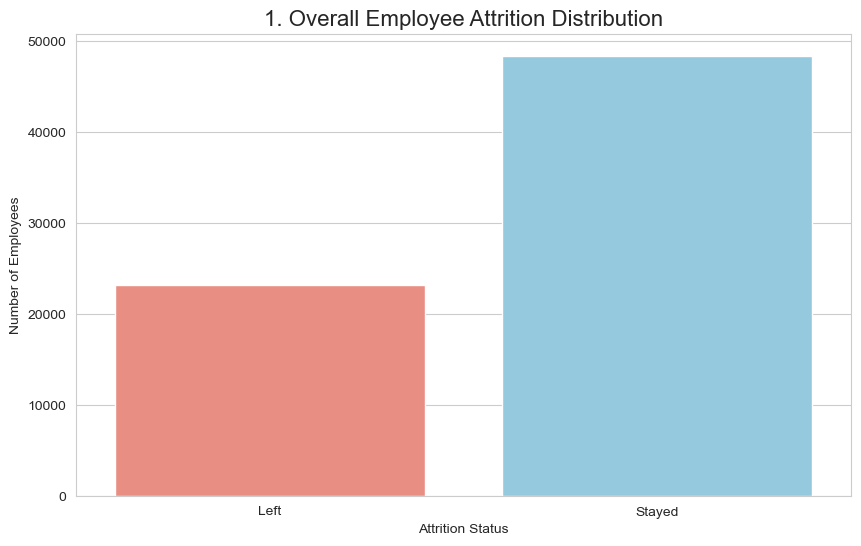

In [37]:
# --- Plotting Setup ---
sns.set_style("whitegrid")
palette_colors = {"Stayed": "skyblue", "Left": "salmon"}

# --- Visualization 1: Overall Attrition ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attrition', palette=palette_colors)
plt.title('1. Overall Employee Attrition Distribution', fontsize=16)
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

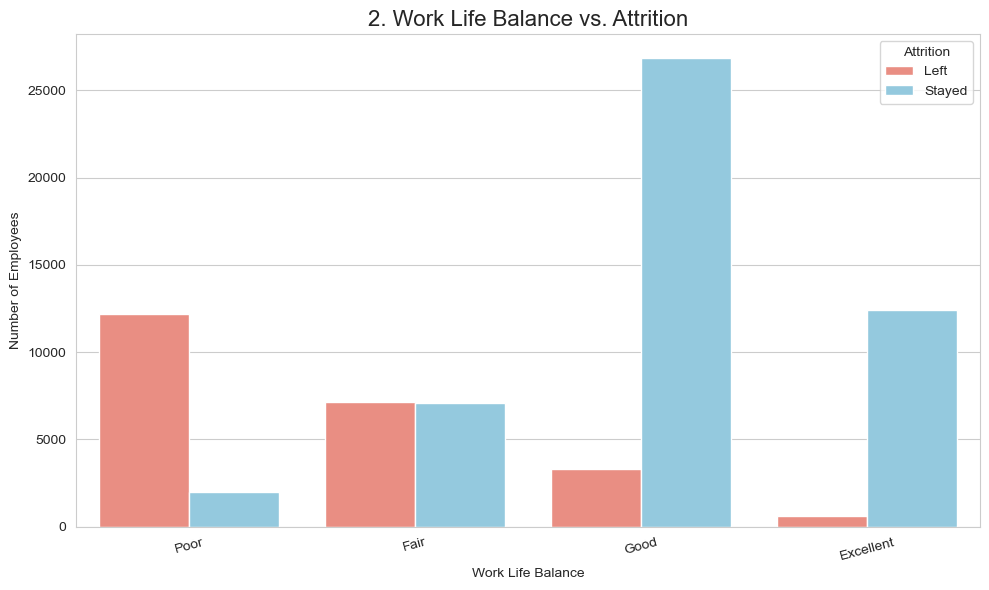

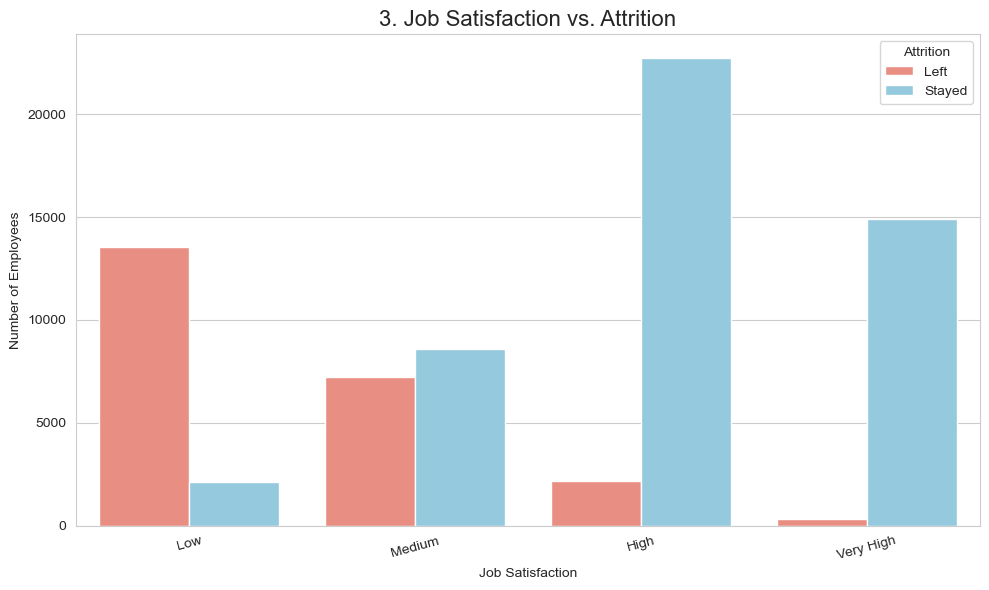

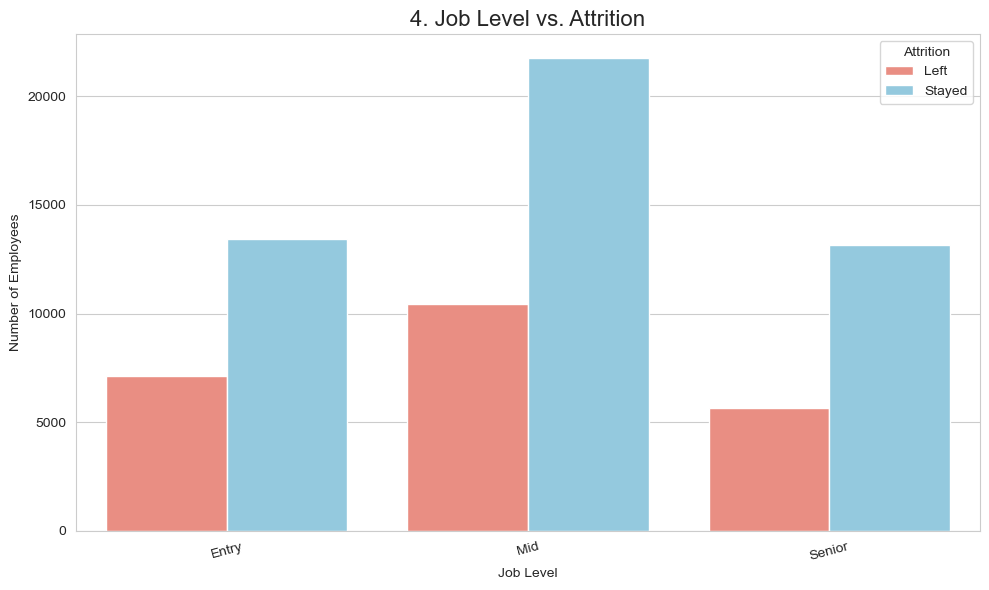

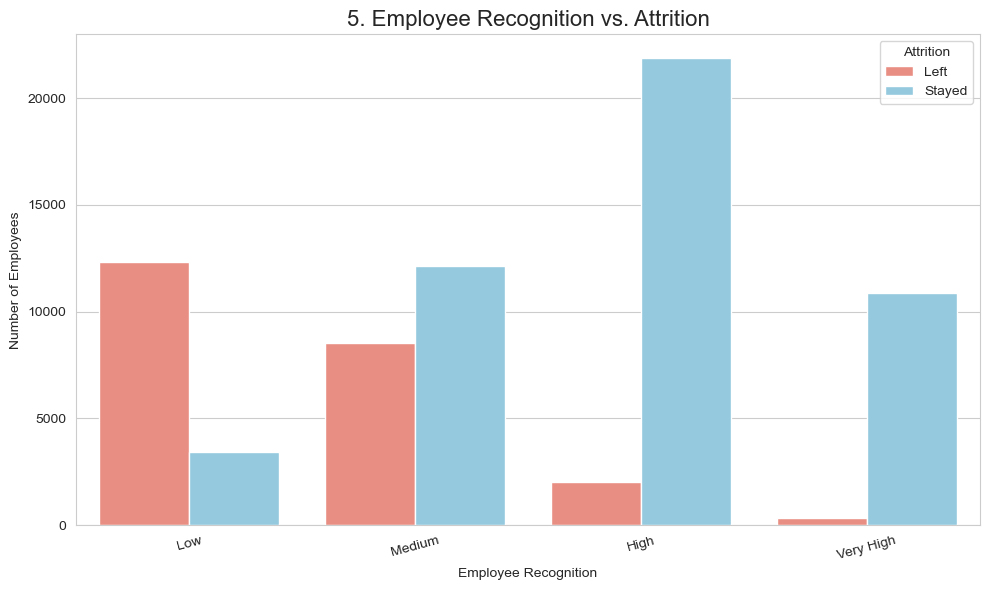

In [38]:
# --- Visualizations 2-5: Categorical Features ---
categorical_features = ['work_life_balance', 'job_satisfaction', 'job_level', 'employee_recognition']
for i, feature in enumerate(categorical_features, 2):
    plt.figure(figsize=(10, 6))
    order = None
    if feature == 'work_life_balance': order = ['Poor', 'Fair', 'Good', 'Excellent']
    elif feature == 'job_satisfaction': order = ['Low', 'Medium', 'High', 'Very High']
    elif feature == 'job_level': order = ['Entry', 'Mid', 'Senior']
    elif feature == 'employee_recognition': order = ['Low', 'Medium', 'High', 'Very High']
    
    sns.countplot(data=df, x=feature, hue='attrition', palette=palette_colors, order=order)
    plt.title(f'{i}. {feature.replace("_", " ").title()} vs. Attrition', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


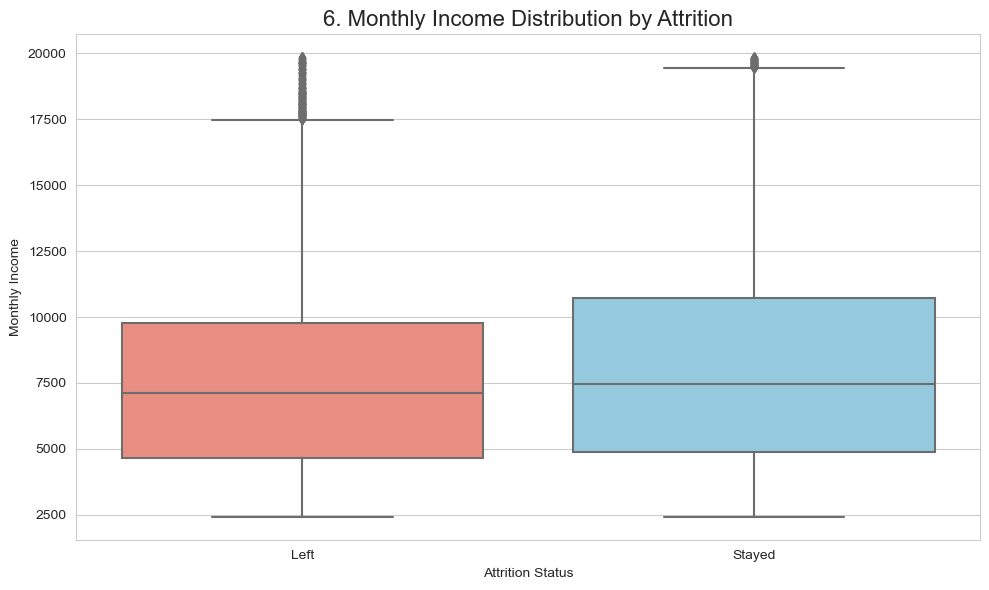

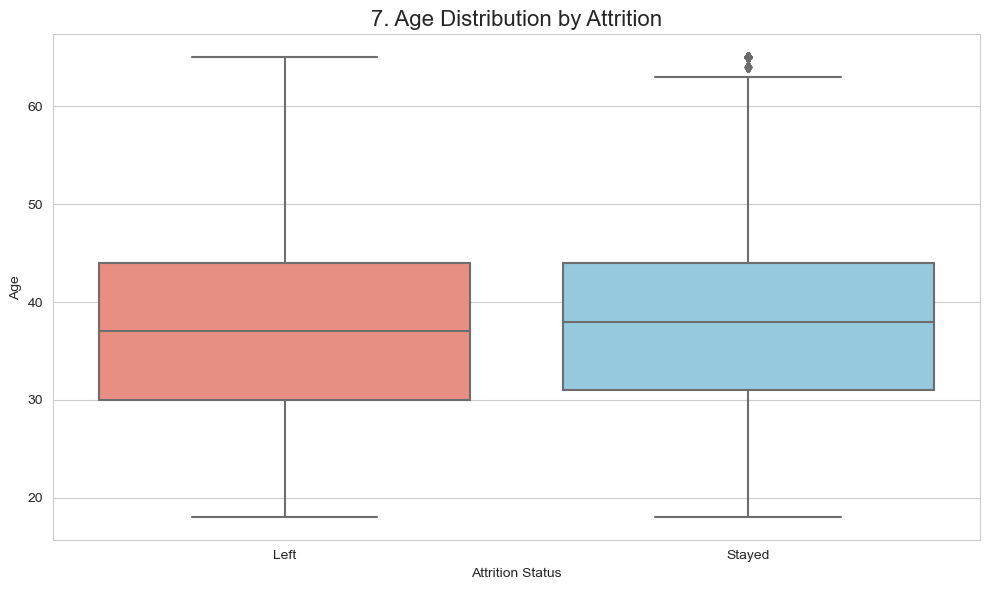

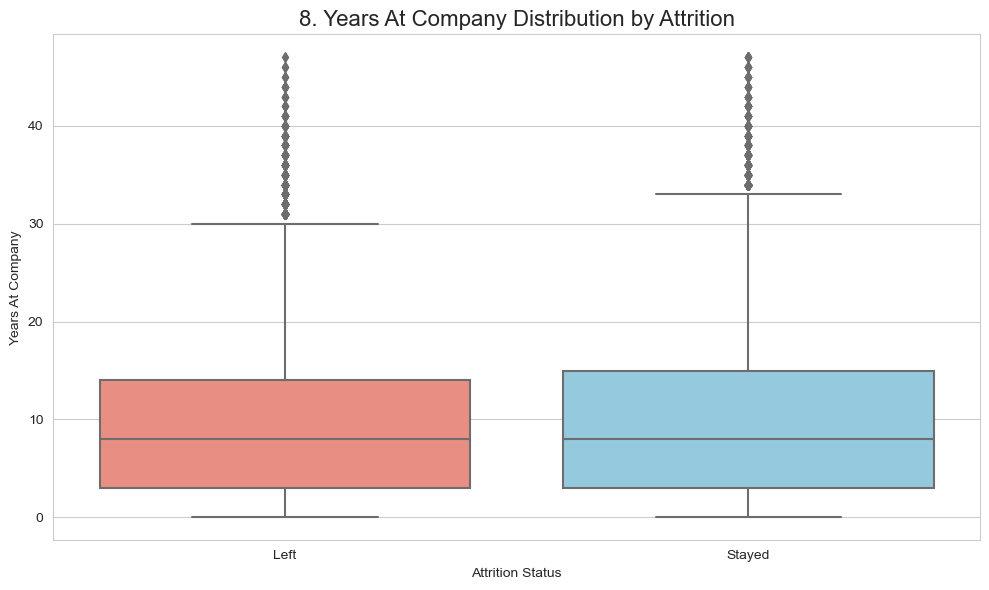

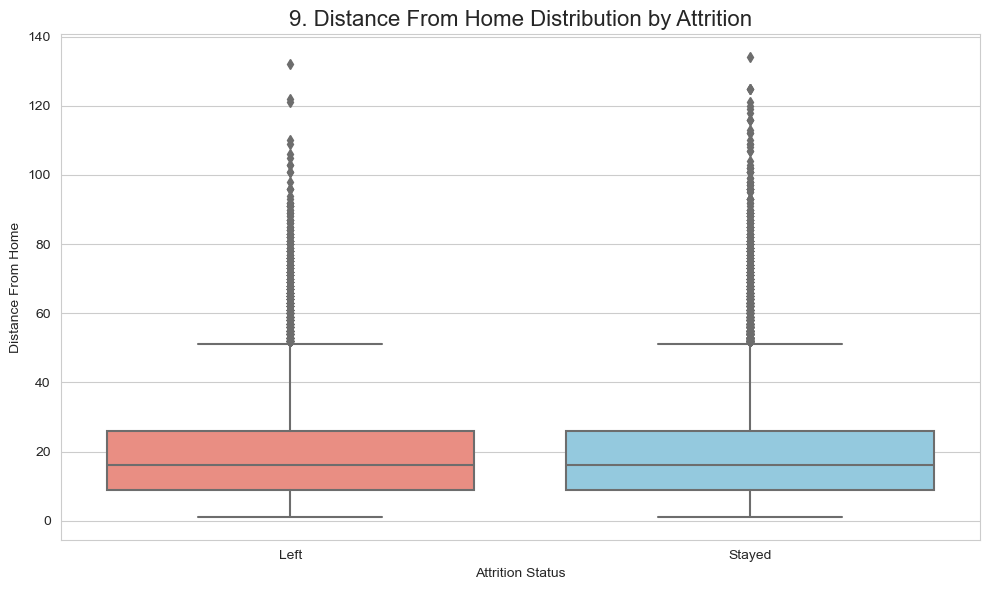

In [39]:
# --- Visualizations 6-9: Numerical Features (Box Plots) ---
numerical_features = ['monthly_income', 'age', 'years_at_company', 'distance_from_home']
for i, feature in enumerate(numerical_features, 6):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='attrition', y=feature, palette=palette_colors)
    plt.title(f'{i}. {feature.replace("_", " ").title()} Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition Status')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()    

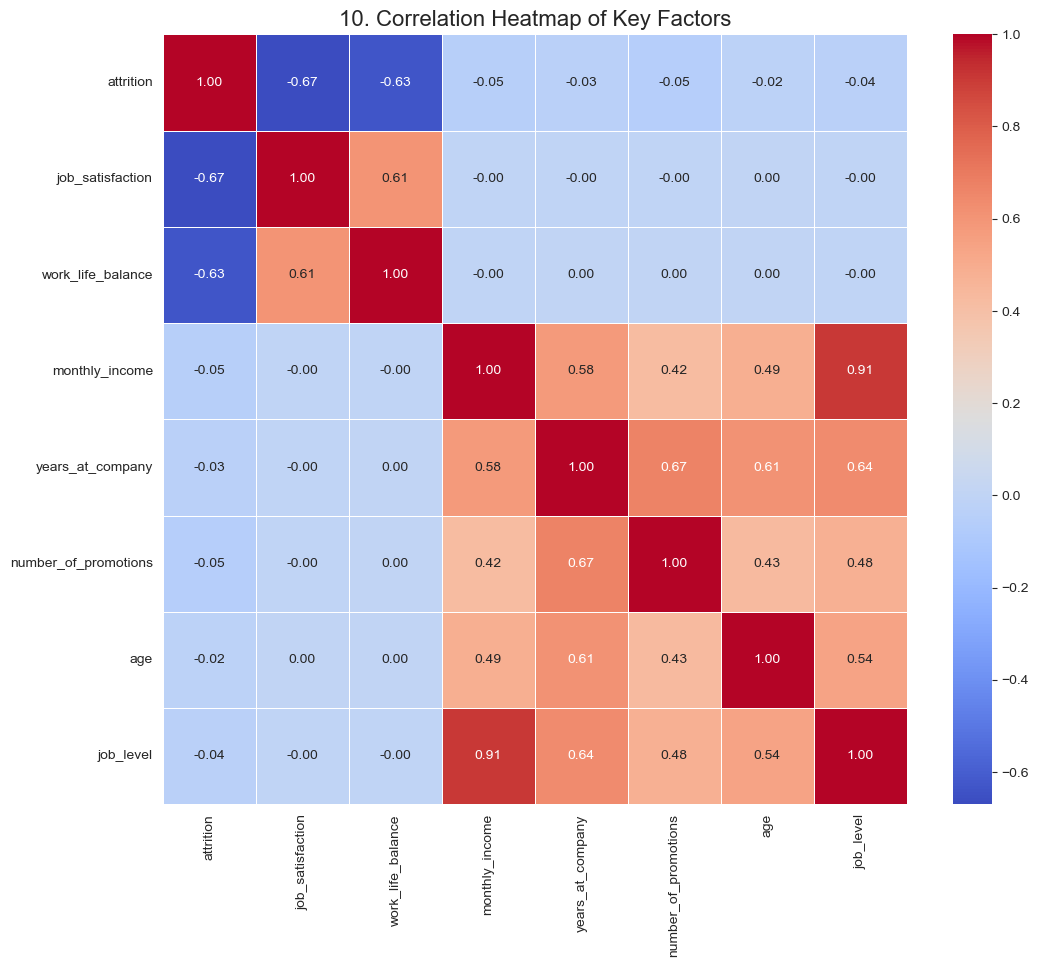

In [40]:
# --- Visualization 10: Correlation Heatmap ---
df_corr = df.copy()
df_corr['attrition'] = df_corr['attrition'].map({'Stayed': 0, 'Left': 1})
mappings = {
    'work_life_balance': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'job_satisfaction': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3},
    'job_level': {'Entry': 0, 'Mid': 1, 'Senior': 2},
    'employee_recognition': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
}
for col, mapping in mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# We select only the most relevant columns for a cleaner heatmap
relevant_cols = ['attrition', 'job_satisfaction', 'work_life_balance', 'monthly_income', 
                 'years_at_company', 'number_of_promotions', 'age', 'job_level']
correlation_matrix = df_corr[relevant_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('10. Correlation Heatmap of Key Factors', fontsize=16)
plt.show()

In [41]:
df_scaled.to_csv("../../data/Faker_Data/scaled_data.csv", index=False)

## Advanced Visualizations
Here we add a few deeper plots to explore relationships between tenure, salary bands, job roles, and attrition. These use seaborn/matplotlib for static plots and Plotly for an interactive treemap.

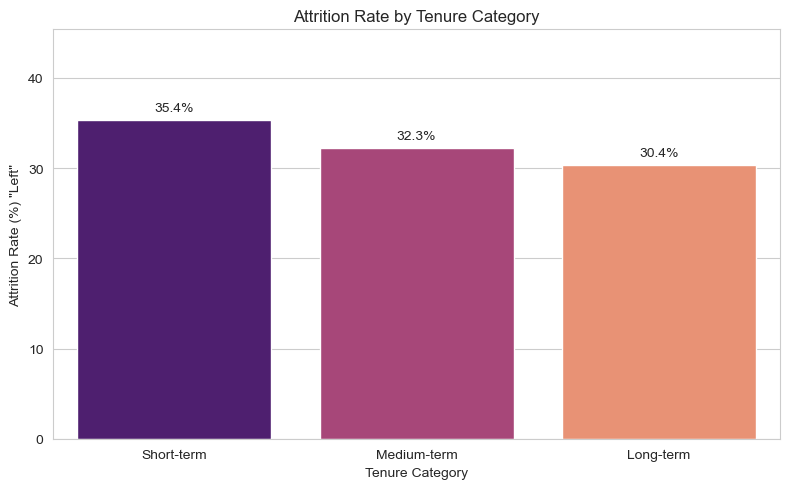

In [42]:
# 1) Attrition rate by Tenure Category (percent)
# Recreate tenure categories on the original df to avoid depending on encoding steps
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

analysis_df = df.copy()
analysis_df['tenure_category'] = analysis_df['years_at_company'].apply(tenure_category)
analysis_df['attrition_left'] = (analysis_df['attrition'] == 'Left').astype(int)
tenure_rates = analysis_df.groupby('tenure_category')['attrition_left'].mean().reindex(['Short-term','Medium-term','Long-term']) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=tenure_rates.index, y=tenure_rates.values, palette='magma')
plt.ylabel('Attrition Rate (%) "Left"')
plt.xlabel('Tenure Category')
plt.title('Attrition Rate by Tenure Category')
for i, v in enumerate(tenure_rates.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.ylim(0, max(tenure_rates.values) + 10)
plt.tight_layout()
plt.show()

**Insight — Attrition Rate by Tenure Category**:
- Short-term employees tend to have the highest attrition rate, which suggests onboarding and early engagement are critical.
- Medium-term employees may show moderate attrition tied to career progression and recognition.
- Long-term employees usually have the lowest attrition — retention here is often driven by late-career benefits and stability.
Actionable: Focus retention efforts on the first 3 years with mentorship, clearer career paths, and early recognition.

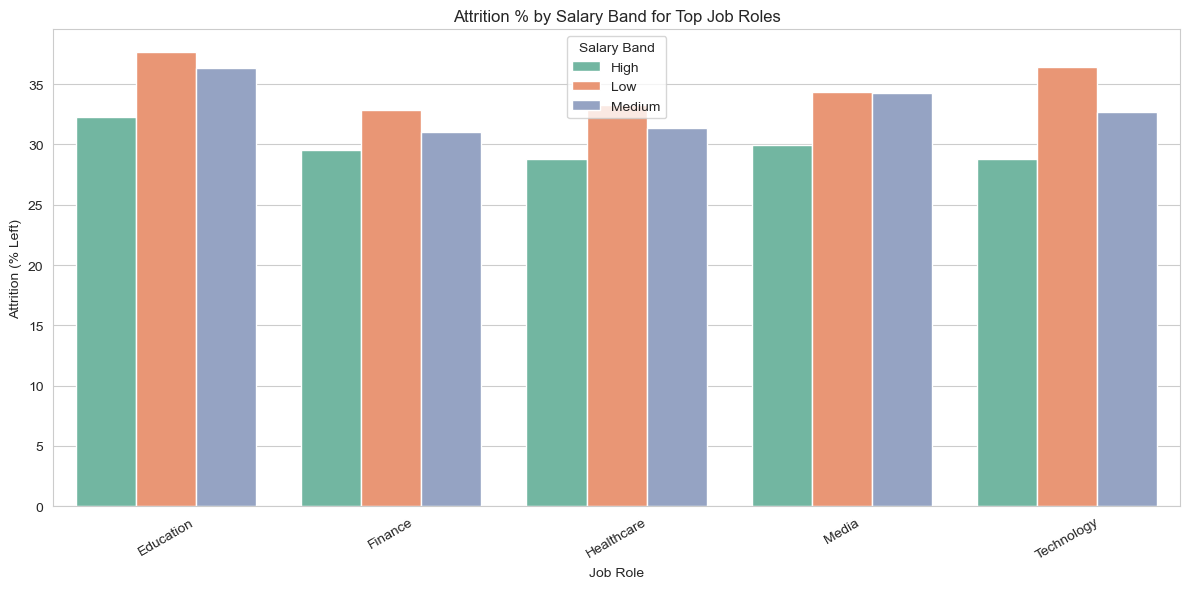

In [43]:
# 2) Salary Band vs Job Role — stacked/grouped view of attrition proportions
# Build counts and normalize within job_role to show distribution across salary bands and attrition
analysis_df['salary_band'] = analysis_df['monthly_income'].apply(lambda income: 'Low' if income < 4755 else ('Medium' if income < 10329 else 'High'))
pivot = pd.crosstab([analysis_df['job_role'], analysis_df['salary_band']], analysis_df['attrition']).reset_index()
pivot.columns.name = None
# compute percent Left within each job_role x salary_band group
pivot['total'] = pivot['Left'] + pivot['Stayed'] if 'Left' in pivot.columns and 'Stayed' in pivot.columns else pivot.iloc[:,2:].sum(axis=1)
pivot['left_pct'] = 100 * pivot['Left'] / pivot['total']

# Plot: for clarity show grouped barplot of left_pct by salary_band for top job roles by count
top_roles = analysis_df['job_role'].value_counts().nlargest(6).index.tolist()
plot_df = pivot[pivot['job_role'].isin(top_roles)]
plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='job_role', y='left_pct', hue='salary_band', palette='Set2')
plt.ylabel('Attrition (% Left)')
plt.xlabel('Job Role')
plt.title('Attrition % by Salary Band for Top Job Roles')
plt.legend(title='Salary Band')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Insight — Attrition % by Salary Band for Top Job Roles**:
- Comparing salary bands within job roles shows whether low/medium paid people in the same role are more likely to leave.
- If Low band employees in specific roles have notably higher attrition, consider targeted pay adjustments or career progression pathways for those roles.
Actionable: Prioritize compensation reviews for job roles where Low/Medium bands show elevated attrition.

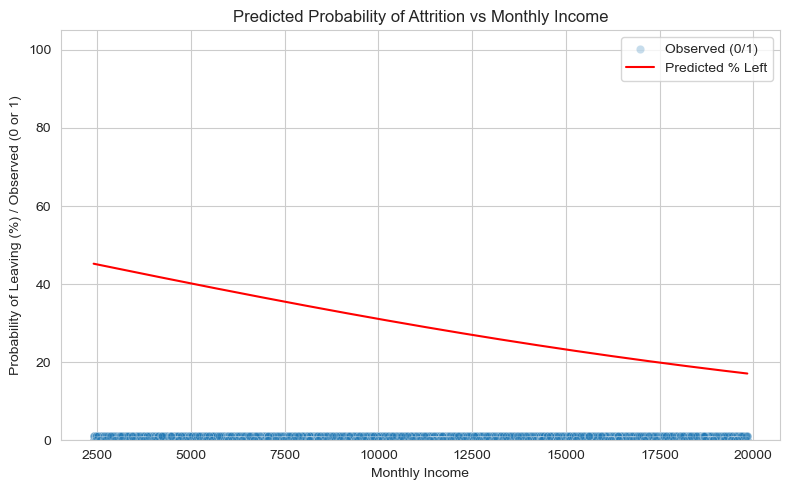

In [44]:
# 3) Logistic regression: probability of leaving vs monthly income (visualized)
from sklearn.linear_model import LogisticRegression
# Prepare data
X = analysis_df[['monthly_income']].fillna(analysis_df['monthly_income'].median())
y = analysis_df['attrition_left']
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
# Predict across income range
income_range = np.linspace(X['monthly_income'].min(), X['monthly_income'].max(), 300).reshape(-1,1)
probs = model.predict_proba(income_range)[:,1] * 100

plt.figure(figsize=(8,5))
sns.scatterplot(data=analysis_df, x='monthly_income', y='attrition_left', alpha=0.25, label='Observed (0/1)')
sns.lineplot(x=income_range.flatten(), y=probs, color='red', label='Predicted % Left')
plt.ylabel('Probability of Leaving (%) / Observed (0 or 1)')
plt.xlabel('Monthly Income')
plt.title('Predicted Probability of Attrition vs Monthly Income')
plt.ylim(-0.05, 105)
plt.legend()
plt.tight_layout()
plt.show()

**Insight — Predicted Probability of Attrition vs Monthly Income**:
- The logistic curve visualizes how monthly income alone correlates with leaving probability. Look for non-linear patterns (e.g., higher leaving probability at lower incomes).
- Use this in combination with role-level views: a high predicted probability at a certain income range for high-turnover roles signals compensation-driven churn.
Actionable: Use predicted probability to prioritize salary ranges for intervention and to inform compensation benchmarking.

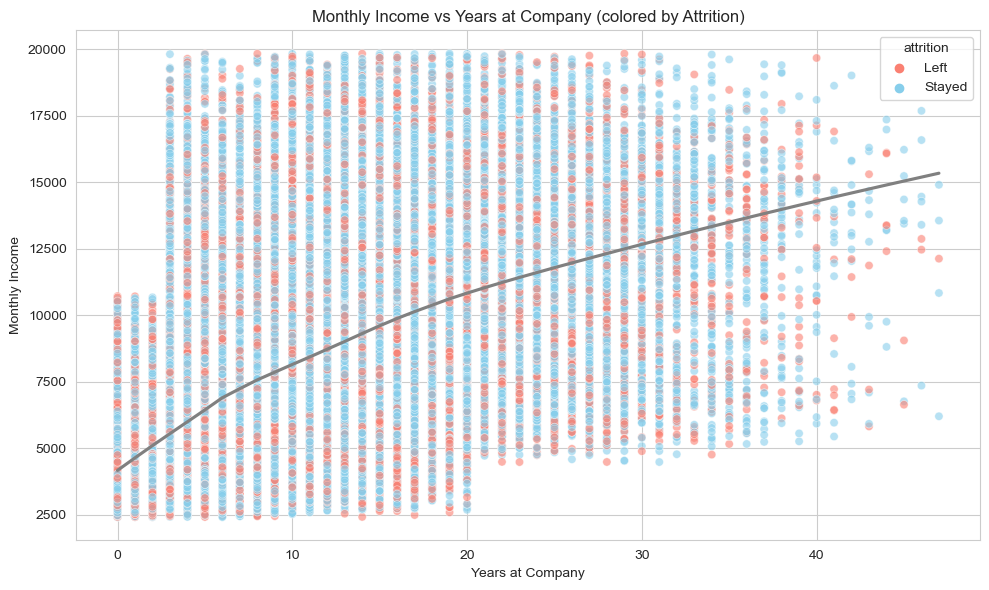

In [45]:
# 4) Scatter + regression: monthly_income vs years_at_company colored by attrition
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df, x='years_at_company', y='monthly_income', hue=analysis_df['attrition'], alpha=0.6, palette=palette_colors)
sns.regplot(data=analysis_df, x='years_at_company', y='monthly_income', scatter=False, color='gray', lowess=True)
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Years at Company (colored by Attrition)')
plt.tight_layout()
plt.show()

#### Employees with long tenure but low income show higher attrition risk.
**Insight — Monthly Income vs Years at Company (colored by Attrition)**:
- The scatter plot reveals whether tenure correlates with pay progression and whether employees who leave cluster in particular parts of the tenure-income space.
- A flat or downward trend in income with tenure for leavers would indicate pay progression issues.
Actionable: Review promotion/raise cadence for cohorts with low income growth and high attrition.

In [46]:
# 5) Plotly Treemap: Job Role -> Attrition counts (interactive)
df_counts = analysis_df.groupby(['job_role','attrition']).size().reset_index(name='count')
try:
    fig = px.treemap(df_counts, path=['job_role','attrition'], values='count', color='count', color_continuous_scale='Viridis')
    fig.update_layout(title='Treemap of Job Role and Attrition (counts)')
    fig.show()
except Exception as e:
    print('Plotly display failed in this environment — create the figure object and display in an interactive notebook.', e)

**Insight — Treemap of Job Role and Attrition**:
- The treemap highlights which job roles contribute the most to attrition by area size and shows the attrition split inside each role.
- This is useful to quickly spot roles where the absolute number of leavers is high even if the percentage isn't.
Actionable: Combine treemap findings with percentage charts to prioritize interventions by either impact (count) or severity (rate).

- Salary band effects: inspect roles where Low/Medium income shows higher leaving rates — targeted compensation reviews may help.
- The logistic regression curve shows how probability of leaving varies with monthly income; use it together with job role stratification to refine pay strategy.
- Work-life balance and job satisfaction are strong categorical signals: improvements here likely reduce attrition.
